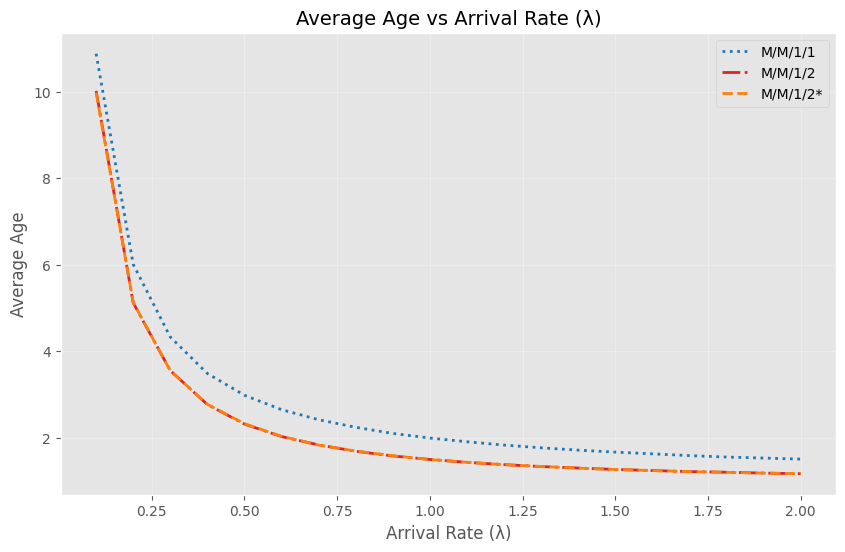

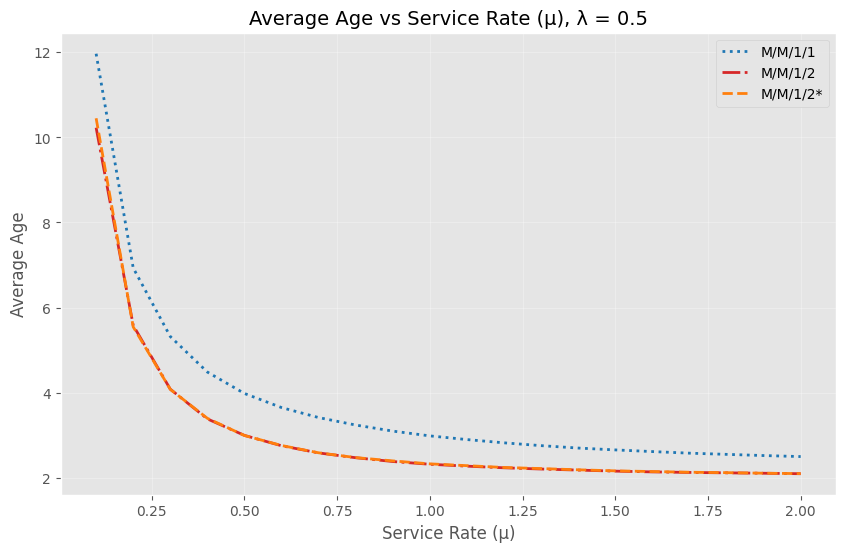

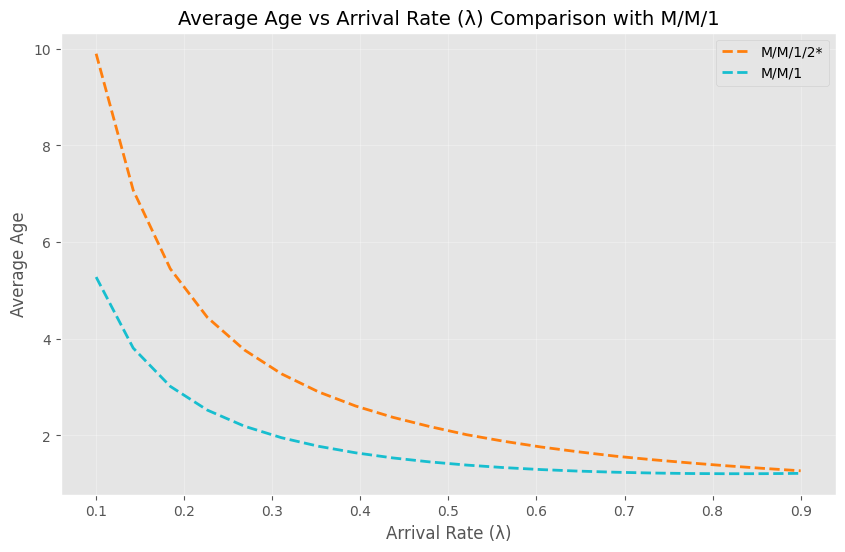

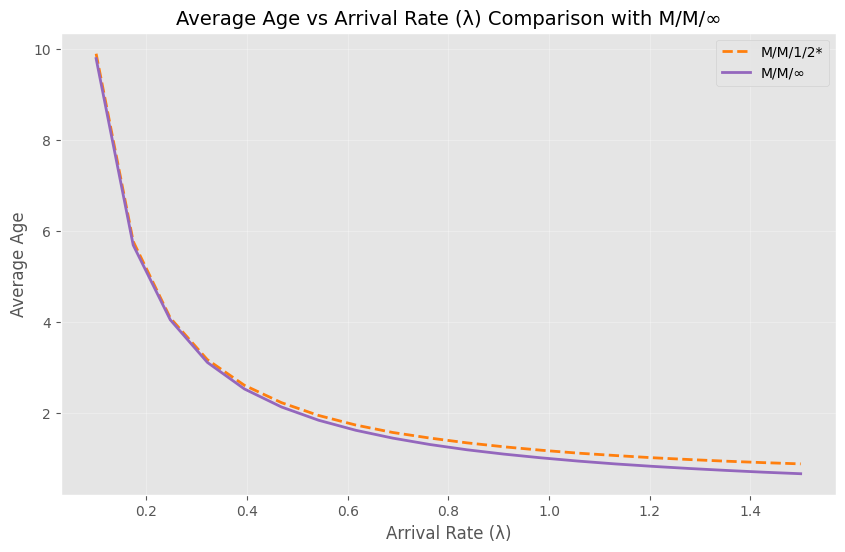

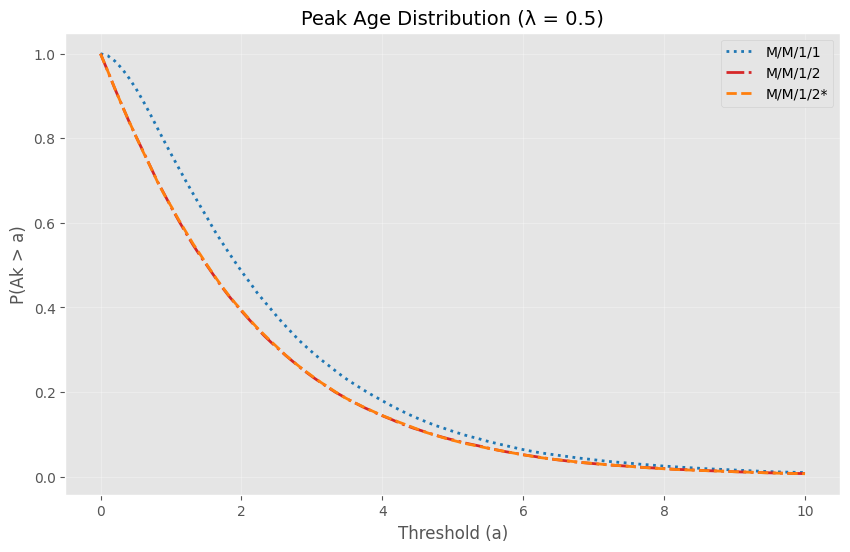

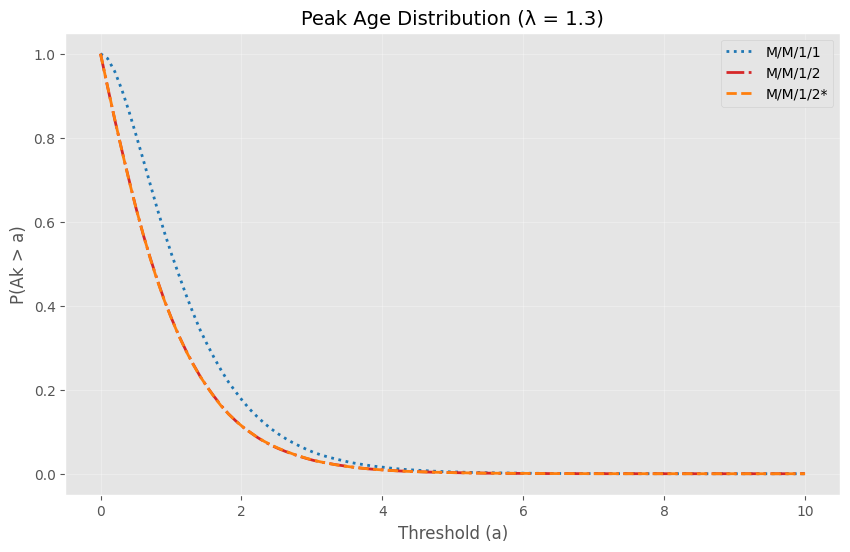

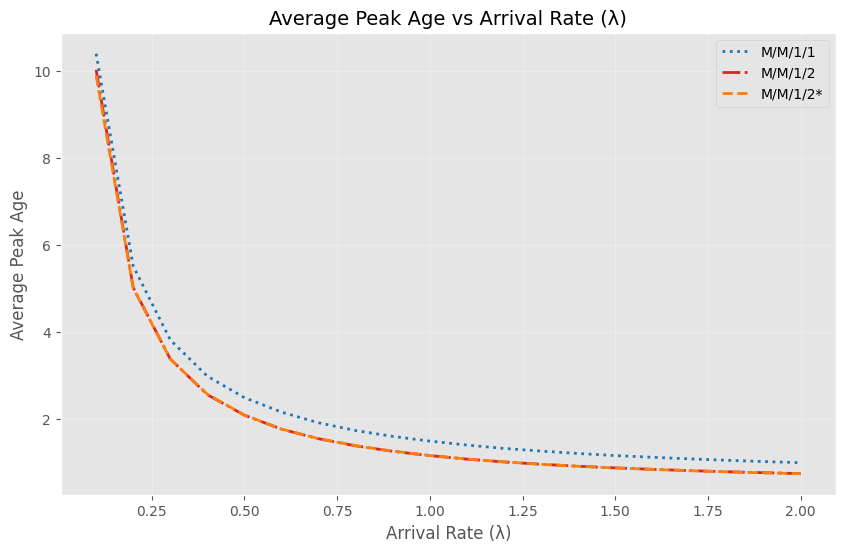

Total execution time: 59.24413466453552 seconds


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

class Packet:
    def __init__(self, arrival_time):
        self.arrival_time = arrival_time
        self.service_time = None

def simulate(arrival_rate, service_rate, queue_size, policy, sim_time):
    np.random.seed(42)
    current_time = 0
    queue = []
    aoi_list = []
    peak_aoi_list = []
    last_departure_time = 0
    next_arrival = np.random.exponential(1 / arrival_rate)
    next_departure = float('inf')
    
    while current_time < sim_time:
        if next_arrival <= next_departure:
            current_time = next_arrival
            packet = Packet(current_time)
            
            if len(queue) < queue_size:
                queue.append(packet)
                if len(queue) == 1:
                    service_time = np.random.exponential(1 / service_rate)
                    next_departure = current_time + service_time
            elif policy == 'M/M/1/2*':
                if queue:
                    queue.pop(0)
                queue.append(packet)
                service_time = np.random.exponential(1 / service_rate)
                next_departure = current_time + service_time
            next_arrival = current_time + np.random.exponential(1 / arrival_rate)
        else:
            current_time = next_departure
            if queue:
                packet = queue.pop(0)
                packet.service_time = current_time
                aoi = current_time - last_departure_time
                aoi_list.append(aoi)
                peak_aoi = current_time - last_departure_time
                peak_aoi_list.append(peak_aoi)
                last_departure_time = current_time
                if queue:
                    service_time = np.random.exponential(1 / service_rate)
                    next_departure = current_time + service_time
                else:
                    next_departure = float('inf')
            else:
                next_departure = float('inf')
    return aoi_list, peak_aoi_list

def simulate_mm_inf(arrival_rate, service_rate, sim_time):
    np.random.seed(42)
    arrival_times = []
    current_time = 0
    while current_time < sim_time:
        inter_arrival = np.random.exponential(1 / arrival_rate)
        current_time += inter_arrival
        arrival_times.append(current_time)
    arrival_times = np.array(arrival_times)
    service_times = np.random.exponential(1 / service_rate, size=len(arrival_times))
    departure_times = arrival_times + service_times
    aoi_list = np.diff(departure_times)
    return aoi_list

def compute_average_aoi(aoi_list):
    return np.mean(aoi_list)

def compute_average_peak_aoi(peak_aoi_list):
    return np.mean(peak_aoi_list)

def theoretical_mm1_aoi(arrival_rate, service_rate=1.0):
    rho = arrival_rate / service_rate
    if rho >= 1:
        return float('inf')
    return (1 + rho**2) / (2 * arrival_rate * (1 - rho))

start_time = time.time()
# Parameters
service_rate = 1.0
sim_time = 90000

# Updated colors and line styles
colors = {
    'M/M/1/1': '#1f77b4',    # Blue
    'M/M/1/2':  '#d62728',    # Red
    'M/M/1/2*': '#ff7f0e',   # Darker orange 
    'M/M/∞': '#9467bd',      # Purple
    'M/M/1': '#17becf'       # Cyan
}

line_styles = {
    'M/M/1/1': ':',
    'M/M/1/2': '-.',
    'M/M/1/2*': '--',
    'M/M/∞': '-',
    'M/M/1': '--'
}

# 1. Average age versus arrival rate
arrival_rates = np.linspace(0.1, 2.0, 20)
average_ages_mm11 = []
average_ages_mm12 = []
average_ages_mm12_star = []

for arrival_rate in arrival_rates:
    aoi_mm11, _ = simulate(arrival_rate, service_rate, queue_size=1, policy='M/M/1/1', sim_time=sim_time)
    average_ages_mm11.append(compute_average_aoi(aoi_mm11))
    
    aoi_mm12, _ = simulate(arrival_rate, service_rate, queue_size=2, policy='M/M/1/2', sim_time=sim_time)
    average_ages_mm12.append(compute_average_aoi(aoi_mm12))
    
    aoi_mm12_star, _ = simulate(arrival_rate, service_rate, queue_size=2, policy='M/M/1/2*', sim_time=sim_time)
    average_ages_mm12_star.append(compute_average_aoi(aoi_mm12_star))

plt.figure(figsize=(10, 6))
plt.plot(arrival_rates, average_ages_mm11, line_styles['M/M/1/1'], color=colors['M/M/1/1'], label='M/M/1/1', linewidth=2)
plt.plot(arrival_rates, average_ages_mm12, line_styles['M/M/1/2'], color=colors['M/M/1/2'], label='M/M/1/2', linewidth=2)
plt.plot(arrival_rates, average_ages_mm12_star, line_styles['M/M/1/2*'], color=colors['M/M/1/2*'], label='M/M/1/2*', linewidth=2)
plt.xlabel('Arrival Rate (λ)', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.title('Average Age vs Arrival Rate (λ)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.show()

# 2. Average age versus service rate
service_rates = np.linspace(0.1, 2.0, 20)
arrival_rate_fixed = 0.5
average_ages_mm11_sr = []
average_ages_mm12_sr = []
average_ages_mm12_star_sr = []

for service_rate in service_rates:
    aoi_mm11, _ = simulate(arrival_rate_fixed, service_rate, queue_size=1, policy='M/M/1/1', sim_time=sim_time)
    average_ages_mm11_sr.append(compute_average_aoi(aoi_mm11))
    
    aoi_mm12, _ = simulate(arrival_rate_fixed, service_rate, queue_size=2, policy='M/M/1/2', sim_time=sim_time)
    average_ages_mm12_sr.append(compute_average_aoi(aoi_mm12))
    
    aoi_mm12_star, _ = simulate(arrival_rate_fixed, service_rate, queue_size=2, policy='M/M/1/2*', sim_time=sim_time)
    average_ages_mm12_star_sr.append(compute_average_aoi(aoi_mm12_star))

plt.figure(figsize=(10, 6))
plt.plot(service_rates, average_ages_mm11_sr, line_styles['M/M/1/1'], color=colors['M/M/1/1'], label='M/M/1/1', linewidth=2)
plt.plot(service_rates, average_ages_mm12_sr, line_styles['M/M/1/2'], color=colors['M/M/1/2'], label='M/M/1/2', linewidth=2)
plt.plot(service_rates, average_ages_mm12_star_sr, line_styles['M/M/1/2*'], color=colors['M/M/1/2*'], label='M/M/1/2*', linewidth=2)
plt.xlabel('Service Rate (μ)', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.title('Average Age vs Service Rate (μ), λ = 0.5', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.show()

# 3. Average age versus arrival rate comparison with M/M/1
arrival_rates_comp1 = np.linspace(0.1, 0.9, 20)
average_ages_mm1_theoretical = []
average_ages_mm12_star_comp1 = []

for arrival_rate in arrival_rates_comp1:
    theoretical_aoi = theoretical_mm1_aoi(arrival_rate, service_rate)
    average_ages_mm1_theoretical.append(theoretical_aoi)
    
    aoi_mm12_star, _ = simulate(arrival_rate, service_rate, queue_size=2, policy='M/M/1/2*', sim_time=sim_time)
    average_ages_mm12_star_comp1.append(compute_average_aoi(aoi_mm12_star))

plt.figure(figsize=(10, 6))
plt.plot(arrival_rates_comp1, average_ages_mm12_star_comp1, line_styles['M/M/1/2*'], color=colors['M/M/1/2*'], label='M/M/1/2*', linewidth=2)
plt.plot(arrival_rates_comp1, average_ages_mm1_theoretical, line_styles['M/M/1'], color=colors['M/M/1'], label='M/M/1', linewidth=2)
plt.xlabel('Arrival Rate (λ)', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.title('Average Age vs Arrival Rate (λ) Comparison with M/M/1', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.show()

# 4. Average age versus arrival rate comparison with M/M/∞
arrival_rates_comp2 = np.linspace(0.1, 1.5, 20)
average_ages_mm_inf = []
average_ages_mm12_star_comp2 = []

for arrival_rate in arrival_rates_comp2:
    aoi_mm_inf = simulate_mm_inf(arrival_rate, service_rate, sim_time=sim_time)
    average_ages_mm_inf.append(compute_average_aoi(aoi_mm_inf))
    
    aoi_mm12_star, _ = simulate(arrival_rate, service_rate, queue_size=2, policy='M/M/1/2*', sim_time=sim_time)
    average_ages_mm12_star_comp2.append(compute_average_aoi(aoi_mm12_star))

plt.figure(figsize=(10, 6))
plt.plot(arrival_rates_comp2, average_ages_mm12_star_comp2, line_styles['M/M/1/2*'], color=colors['M/M/1/2*'], label='M/M/1/2*', linewidth=2)
plt.plot(arrival_rates_comp2, average_ages_mm_inf, line_styles['M/M/∞'], color=colors['M/M/∞'], label='M/M/∞', linewidth=2)
plt.xlabel('Arrival Rate (λ)', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.title('Average Age vs Arrival Rate (λ) Comparison with M/M/∞', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.show()

# 5. Peak age distribution
thresholds = np.linspace(0, 10, 100)
arrival_rates_pa = [0.5, 1.3]
policies = ['M/M/1/1', 'M/M/1/2', 'M/M/1/2*']

for arrival_rate in arrival_rates_pa:
    plt.figure(figsize=(10, 6))
    for policy in policies:
        _, peak_aoi_list = simulate(
            arrival_rate,
            service_rate,
            queue_size=1 if policy == 'M/M/1/1' else 2,
            policy=policy,
            sim_time=sim_time
        )
        peak_aois = []
        for threshold in thresholds:
            count = sum(1 for aoi in peak_aoi_list if aoi > threshold)
            probability = count / len(peak_aoi_list)
            peak_aois.append(probability)
        plt.plot(thresholds, peak_aois, line_styles[policy], color=colors[policy], label=policy, linewidth=2)
    
    plt.xlabel('Threshold (a)', fontsize=12)
    plt.ylabel('P(Ak > a)', fontsize=12)
    plt.title(f'Peak Age Distribution (λ = {arrival_rate})', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    plt.show()

# 6. Average peak age versus arrival rate
average_peak_ages_mm11 = []
average_peak_ages_mm12 = []
average_peak_ages_mm12_star = []

for arrival_rate in arrival_rates:
    _, peak_aoi_mm11 = simulate(arrival_rate, service_rate, queue_size=1, policy='M/M/1/1', sim_time=sim_time)
    average_peak_ages_mm11.append(compute_average_peak_aoi(peak_aoi_mm11))
    
    _, peak_aoi_mm12 = simulate(arrival_rate, service_rate, queue_size=2, policy='M/M/1/2', sim_time=sim_time)
    average_peak_ages_mm12.append(compute_average_peak_aoi(peak_aoi_mm12))
    
    _, peak_aoi_mm12_star = simulate(arrival_rate, service_rate, queue_size=2, policy='M/M/1/2*', sim_time=sim_time)
    average_peak_ages_mm12_star.append(compute_average_peak_aoi(peak_aoi_mm12_star))

plt.figure(figsize=(10, 6))
plt.plot(arrival_rates, average_peak_ages_mm11, line_styles['M/M/1/1'], color=colors['M/M/1/1'], label='M/M/1/1', linewidth=2)
plt.plot(arrival_rates, average_peak_ages_mm12, line_styles['M/M/1/2'], color=colors['M/M/1/2'], label='M/M/1/2', linewidth=2)
plt.plot(arrival_rates, average_peak_ages_mm12_star, line_styles['M/M/1/2*'], color=colors['M/M/1/2*'], label='M/M/1/2*', linewidth=2)
plt.xlabel('Arrival Rate (λ)', fontsize=12)
plt.ylabel('Average Peak Age', fontsize=12)
plt.title('Average Peak Age vs Arrival Rate (λ)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.show()

end_time = time.time()
print(f"Total execution time: {end_time - start_time} seconds")